<font size="6"> Credit Default Prediction using Deep Learning Models

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,f1_score,precision_score, recall_score, confusion_matrix, classification_report, fbeta_score
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, MinMaxScaler
from collections import Counter
from tensorflow.keras import layers
from keras.models import Sequential
from keras.wrappers.scikit_learn import KerasClassifier
from scipy.signal import savgol_filter
from keras.layers import Dense, Dropout
from tensorflow import keras
from sklearn import metrics
from imblearn.over_sampling import RandomOverSampler,SMOTE
from imblearn.under_sampling import RandomUnderSampler 


In [2]:
data1 = pd.read_csv('application_data.csv')

In [3]:
#Drop SK_ID_Curr & Target
y= data1['TARGET']
data1=data1.drop(['SK_ID_CURR','TARGET'],axis=1)
print(data1.select_dtypes('object').columns)

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'],
      dtype='object')


In [4]:
#label Encoder for column with <= 2 
le = LabelEncoder()
data1['NAME_CONTRACT_TYPE'] = le.fit_transform(data1['NAME_CONTRACT_TYPE'])
data1['CODE_GENDER'] = le.fit_transform(data1['CODE_GENDER'])
data1['FLAG_OWN_CAR'] = le.fit_transform(data1['FLAG_OWN_CAR'])
data1['FLAG_OWN_REALTY'] = le.fit_transform(data1['FLAG_OWN_REALTY'])
#one hot Enc for column with > 2 
categorical_cols = ['NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE']
data1=pd.get_dummies(data1, columns=categorical_cols)

In [5]:
#Drop Column with missing data >50%
perc = 50.0
min_count =  int(((100-perc)/100)*data1.shape[0] + 1)
data1= data1.dropna( axis=1, 
                thresh=min_count)
df1 = data1.fillna(data1.median())

In [6]:
#Robust Scaler
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df1),columns = df1.columns)

In [7]:
#data split for neural Network
x_train, x_test, y_train, y_test = train_test_split(df_scaled,y, test_size=0.3,  random_state=0)
x_val, x_test, y_val, y_test = train_test_split(x_test,y_test, test_size=0.3,  random_state=0)

<font size="6"> Basic Neural Network Model

In [8]:
from keras.models import Sequential
from keras.layers import Dense
model1 = Sequential([
    Dense(units=16, activation='relu', input_dim=len(df_scaled.columns)),
    Dense(units=1, activation='sigmoid')])
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                3232      
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 3,249
Trainable params: 3,249
Non-trainable params: 0
_________________________________________________________________


In [9]:
hist = model1.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=100, batch_size=10000)

Epoch 1/100
22/22 [==============================] - 1s 19ms/step - loss: 1.8908 - accuracy: 0.6751 - val_loss: 1.0279 - val_accuracy: 0.7578
Epoch 2/100
22/22 [==============================] - 0s 12ms/step - loss: 0.5618 - accuracy: 0.8294 - val_loss: 0.3310 - val_accuracy: 0.9176
Epoch 3/100
22/22 [==============================] - 0s 12ms/step - loss: 0.3175 - accuracy: 0.9182 - val_loss: 0.3130 - val_accuracy: 0.9194
Epoch 4/100
22/22 [==============================] - 0s 11ms/step - loss: 0.3052 - accuracy: 0.9185 - val_loss: 0.3008 - val_accuracy: 0.9195
Epoch 5/100
22/22 [==============================] - 0s 11ms/step - loss: 0.2956 - accuracy: 0.9185 - val_loss: 0.2915 - val_accuracy: 0.9195
Epoch 6/100
22/22 [==============================] - 0s 11ms/step - loss: 0.2888 - accuracy: 0.9186 - val_loss: 0.2856 - val_accuracy: 0.9195
Epoch 7/100
22/22 [==============================] - 0s 11ms/step - loss: 0.2837 - accuracy: 0.9187 - val_loss: 0.2811 - val_accuracy: 0.9197
Epoch 

22/22 [==============================] - 0s 11ms/step - loss: 0.2530 - accuracy: 0.9188 - val_loss: 0.2540 - val_accuracy: 0.9196
Epoch 59/100
22/22 [==============================] - 0s 11ms/step - loss: 0.2529 - accuracy: 0.9188 - val_loss: 0.2533 - val_accuracy: 0.9196
Epoch 60/100
22/22 [==============================] - 0s 11ms/step - loss: 0.2527 - accuracy: 0.9188 - val_loss: 0.2534 - val_accuracy: 0.9196
Epoch 61/100
22/22 [==============================] - 0s 13ms/step - loss: 0.2526 - accuracy: 0.9189 - val_loss: 0.2534 - val_accuracy: 0.9196
Epoch 62/100
22/22 [==============================] - 0s 11ms/step - loss: 0.2528 - accuracy: 0.9188 - val_loss: 0.2537 - val_accuracy: 0.9195
Epoch 63/100
22/22 [==============================] - 0s 11ms/step - loss: 0.2527 - accuracy: 0.9188 - val_loss: 0.2532 - val_accuracy: 0.9195
Epoch 64/100
22/22 [==============================] - 0s 11ms/step - loss: 0.2525 - accuracy: 0.9189 - val_loss: 0.2533 - val_accuracy: 0.9195
Epoch 65/100

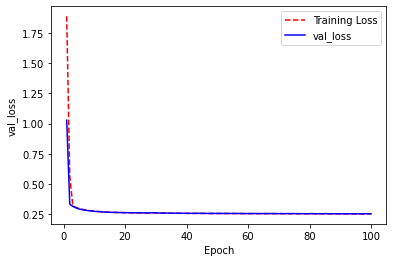

In [10]:
# Get training and test loss histories
training_loss = hist.history['loss']
val_loss = hist.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, val_loss, 'b-')
plt.legend(['Training Loss', 'val_loss'])
plt.xlabel('Epoch')
plt.ylabel('val_loss')
plt.show();

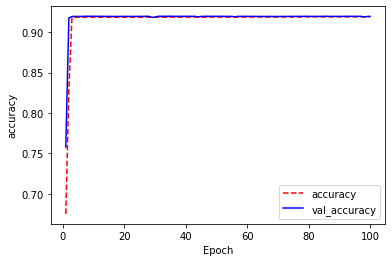

In [11]:
# Get Accuracy
accuracy = hist.history['accuracy']
val_accuracy = hist.history['val_accuracy']

# Visualize loss history
plt.plot(epoch_count, accuracy, 'r--')
plt.plot(epoch_count, val_accuracy, 'b-')
plt.legend(['accuracy', 'val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.show();

Text(33.0, 0.5, 'Actual label')

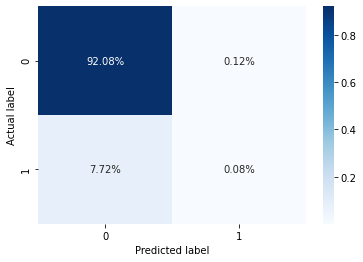

In [12]:
from sklearn.metrics import confusion_matrix
y_pred = model1.predict(x_test) 
y_pred = [1 if x>0.5 else 0 for x in y_pred]
mat = confusion_matrix(y_test, y_pred)
labels = ['Legitimate', 'Fraudulent']
sns.heatmap(mat/np.sum(mat), annot=True,fmt='.2%', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('Actual label')

In [13]:
print(classification_report(y_test, y_pred, target_names=['Class 0','Class 1']))
print('f2 score: ' + str(fbeta_score(y_test, y_pred,average='macro', beta =2 )))
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_pred)
print('AUC Score: ' + str(metrics.auc(fpr, tpr)))

              precision    recall  f1-score   support

     Class 0       0.92      1.00      0.96     25517
     Class 1       0.41      0.01      0.02      2160

    accuracy                           0.92     27677
   macro avg       0.67      0.50      0.49     27677
weighted avg       0.88      0.92      0.89     27677

f2 score: 0.49759005220699615
AUC Score: 0.5044655596341728


<font size="6">  Model 2 (Improved with more layer, dropout, Probability adjustment)

In [17]:
model2 = Sequential([
    Dense(units=120, activation='relu', input_dim=len(df_scaled.columns)),
    Dropout(0.4),
    Dense(units=16, activation='relu'),
    Dense(units=1, activation='sigmoid')])
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 120)               24240     
                                                                 
 dropout (Dropout)           (None, 120)               0         
                                                                 
 dense_3 (Dense)             (None, 16)                1936      
                                                                 
 dense_4 (Dense)             (None, 1)                 17        
                                                                 
Total params: 26,193
Trainable params: 26,193
Non-trainable params: 0
_________________________________________________________________


In [18]:
hist = model2.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=100, batch_size=10000)

Epoch 1/100
22/22 [==============================] - 1s 34ms/step - loss: 2.7791 - accuracy: 0.4989 - val_loss: 0.4998 - val_accuracy: 0.9188
Epoch 2/100
22/22 [==============================] - 1s 28ms/step - loss: 0.5435 - accuracy: 0.9113 - val_loss: 0.4664 - val_accuracy: 0.9198
Epoch 3/100
22/22 [==============================] - 1s 34ms/step - loss: 0.4649 - accuracy: 0.9152 - val_loss: 0.3892 - val_accuracy: 0.9198
Epoch 4/100
22/22 [==============================] - 1s 27ms/step - loss: 0.4035 - accuracy: 0.9124 - val_loss: 0.3391 - val_accuracy: 0.9198
Epoch 5/100
22/22 [==============================] - 1s 27ms/step - loss: 0.3734 - accuracy: 0.9117 - val_loss: 0.3121 - val_accuracy: 0.9198
Epoch 6/100
22/22 [==============================] - 1s 27ms/step - loss: 0.3532 - accuracy: 0.9118 - val_loss: 0.2971 - val_accuracy: 0.9198
Epoch 7/100
22/22 [==============================] - 1s 28ms/step - loss: 0.3422 - accuracy: 0.9131 - val_loss: 0.2875 - val_accuracy: 0.9198
Epoch 

22/22 [==============================] - 1s 26ms/step - loss: 0.2587 - accuracy: 0.9187 - val_loss: 0.2532 - val_accuracy: 0.9198
Epoch 59/100
22/22 [==============================] - 1s 28ms/step - loss: 0.2587 - accuracy: 0.9187 - val_loss: 0.2528 - val_accuracy: 0.9198
Epoch 60/100
22/22 [==============================] - 1s 26ms/step - loss: 0.2587 - accuracy: 0.9187 - val_loss: 0.2529 - val_accuracy: 0.9198
Epoch 61/100
22/22 [==============================] - 1s 26ms/step - loss: 0.2584 - accuracy: 0.9187 - val_loss: 0.2530 - val_accuracy: 0.9198
Epoch 62/100
22/22 [==============================] - 1s 27ms/step - loss: 0.2593 - accuracy: 0.9187 - val_loss: 0.2529 - val_accuracy: 0.9198
Epoch 63/100
22/22 [==============================] - 1s 26ms/step - loss: 0.2583 - accuracy: 0.9187 - val_loss: 0.2529 - val_accuracy: 0.9198
Epoch 64/100
22/22 [==============================] - 1s 27ms/step - loss: 0.2578 - accuracy: 0.9187 - val_loss: 0.2529 - val_accuracy: 0.9198
Epoch 65/100

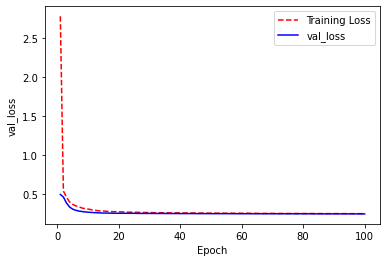

In [19]:
# Get training and test loss histories
training_loss = hist.history['loss']
val_loss = hist.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, val_loss, 'b-')
plt.legend(['Training Loss', 'val_loss'])
plt.xlabel('Epoch')
plt.ylabel('val_loss')
plt.show();

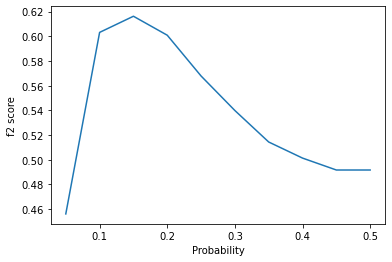

In [20]:
y_predicted = model2.predict(x_test)
k =[]
f2score = []
for i in range(1,11,1):
    i = i*0.05
    k.append(i)
    y_pred = [1 if x>i else 0 for x in y_predicted]
    f2score.append(fbeta_score(y_test, y_pred, average='macro',beta=2))
plt.plot(k,f2score)
plt.xlabel('Probability')
plt.ylabel('f2 score')
plt.show();

Text(33.0, 0.5, 'Actual label')

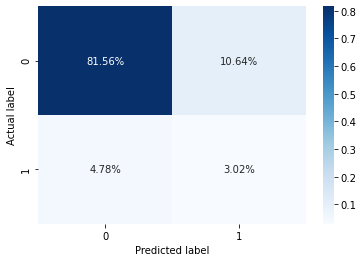

In [21]:
y_pred = model2.predict(x_test) 
y_pred = [1 if x>0.15 else 0 for x in y_pred]
mat = confusion_matrix(y_test, y_pred)
labels = ['Legitimate', 'Fraudulent']
sns.heatmap(mat/np.sum(mat), annot=True,fmt='.2%', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('Actual label')

In [22]:
print(classification_report(y_test, y_pred, target_names=['Class 0','Class 1']))
print('f2 score: ' + str(fbeta_score(y_test, y_pred,average='macro', beta =2 )))
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_pred)
print('AUC Score: ' + str(metrics.auc(fpr, tpr)))

              precision    recall  f1-score   support

     Class 0       0.94      0.88      0.91     25517
     Class 1       0.22      0.39      0.28      2160

    accuracy                           0.85     27677
   macro avg       0.58      0.64      0.60     27677
weighted avg       0.89      0.85      0.86     27677

f2 score: 0.6162485634560522
AUC Score: 0.6358118915639392


<font size="6"> Model after OverSampling 

In [23]:
oversample = RandomOverSampler(sampling_strategy=1)
x_train1, y_train1 = oversample.fit_resample(x_train, y_train)


In [24]:
model3 = Sequential([
    Dense(units=16, activation='relu', input_dim=len(df_scaled.columns)),
    Dense(units=1, activation='sigmoid')])
model3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 16)                3232      
                                                                 
 dense_6 (Dense)             (None, 1)                 17        
                                                                 
Total params: 3,249
Trainable params: 3,249
Non-trainable params: 0
_________________________________________________________________


In [25]:
hist2 = model3.fit(x_train1, y_train1, validation_data=(x_val, y_val), epochs=100, batch_size=10000)

Epoch 1/100
40/40 [==============================] - 1s 14ms/step - loss: 3.2786 - accuracy: 0.5158 - val_loss: 2.7887 - val_accuracy: 0.4280
Epoch 2/100
40/40 [==============================] - 0s 11ms/step - loss: 0.9996 - accuracy: 0.5740 - val_loss: 0.6859 - val_accuracy: 0.6217
Epoch 3/100
40/40 [==============================] - 0s 9ms/step - loss: 0.6656 - accuracy: 0.6207 - val_loss: 0.6262 - val_accuracy: 0.6588
Epoch 4/100
40/40 [==============================] - 0s 10ms/step - loss: 0.6348 - accuracy: 0.6452 - val_loss: 0.6283 - val_accuracy: 0.6567
Epoch 5/100
40/40 [==============================] - 0s 10ms/step - loss: 0.6235 - accuracy: 0.6586 - val_loss: 0.6206 - val_accuracy: 0.6675
Epoch 6/100
40/40 [==============================] - 0s 10ms/step - loss: 0.6164 - accuracy: 0.6659 - val_loss: 0.6115 - val_accuracy: 0.6784
Epoch 7/100
40/40 [==============================] - 0s 10ms/step - loss: 0.6111 - accuracy: 0.6709 - val_loss: 0.6106 - val_accuracy: 0.6816
Epoch 8

40/40 [==============================] - 0s 10ms/step - loss: 0.5838 - accuracy: 0.6904 - val_loss: 0.5855 - val_accuracy: 0.6921
Epoch 59/100
40/40 [==============================] - 0s 10ms/step - loss: 0.5831 - accuracy: 0.6910 - val_loss: 0.5813 - val_accuracy: 0.6957
Epoch 60/100
40/40 [==============================] - 0s 10ms/step - loss: 0.5836 - accuracy: 0.6909 - val_loss: 0.6021 - val_accuracy: 0.6770
Epoch 61/100
40/40 [==============================] - 0s 10ms/step - loss: 0.5826 - accuracy: 0.6914 - val_loss: 0.5799 - val_accuracy: 0.6959
Epoch 62/100
40/40 [==============================] - 0s 10ms/step - loss: 0.5827 - accuracy: 0.6915 - val_loss: 0.5940 - val_accuracy: 0.6847
Epoch 63/100
40/40 [==============================] - 0s 9ms/step - loss: 0.5828 - accuracy: 0.6913 - val_loss: 0.5881 - val_accuracy: 0.6921
Epoch 64/100
40/40 [==============================] - 0s 10ms/step - loss: 0.5825 - accuracy: 0.6914 - val_loss: 0.5883 - val_accuracy: 0.6888
Epoch 65/100


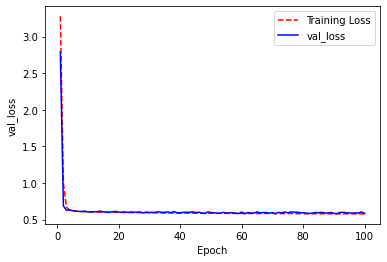

In [26]:
# Get training and test loss histories
training_loss = hist2.history['loss']
val_loss = hist2.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, val_loss, 'b-')
plt.legend(['Training Loss', 'val_loss'])
plt.xlabel('Epoch')
plt.ylabel('val_loss')
plt.show();

Text(33.0, 0.5, 'Actual label')

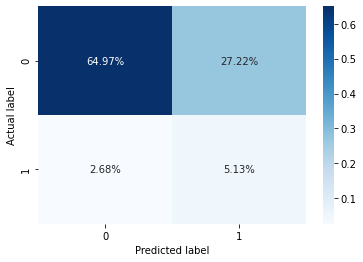

In [27]:
y_pred = model3.predict(x_test) 
y_pred = [1 if x>0.5 else 0 for x in y_pred]
mat = confusion_matrix(y_test, y_pred)
labels = ['Legitimate', 'Fraudulent']
sns.heatmap(mat/np.sum(mat), annot=True,fmt='.2%', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('Actual label')

In [28]:
print(classification_report(y_test, y_pred, target_names=['Class 0','Class 1']))
print('f2 score: ' + str(fbeta_score(y_test, y_pred,average='macro', beta =2 )))
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_pred)
print('AUC Score: ' + str(metrics.auc(fpr, tpr)))

              precision    recall  f1-score   support

     Class 0       0.96      0.70      0.81     25517
     Class 1       0.16      0.66      0.26      2160

    accuracy                           0.70     27677
   macro avg       0.56      0.68      0.53     27677
weighted avg       0.90      0.70      0.77     27677

f2 score: 0.5738030056861736
AUC Score: 0.6808255552942919


In [29]:
model4 = Sequential([
    Dense(units=120, activation='relu', input_dim=len(df_scaled.columns)),
    Dropout(0.5),
    Dense(units=16, activation='relu'),
    Dense(units=1, activation='sigmoid')])
model4.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 120)               24240     
                                                                 
 dropout_1 (Dropout)         (None, 120)               0         
                                                                 
 dense_8 (Dense)             (None, 16)                1936      
                                                                 
 dense_9 (Dense)             (None, 1)                 17        
                                                                 
Total params: 26,193
Trainable params: 26,193
Non-trainable params: 0
_________________________________________________________________


In [30]:
hist2 = model4.fit(x_train1, y_train1, validation_data=(x_val, y_val), epochs=100, batch_size=10000)

Epoch 1/100
40/40 [==============================] - 2s 30ms/step - loss: 1.2230 - accuracy: 0.5329 - val_loss: 0.6837 - val_accuracy: 0.4915
Epoch 2/100
40/40 [==============================] - 1s 25ms/step - loss: 0.7391 - accuracy: 0.5756 - val_loss: 0.6453 - val_accuracy: 0.6947
Epoch 3/100
40/40 [==============================] - 1s 24ms/step - loss: 0.6732 - accuracy: 0.6052 - val_loss: 0.6296 - val_accuracy: 0.7591
Epoch 4/100
40/40 [==============================] - 1s 26ms/step - loss: 0.6565 - accuracy: 0.6204 - val_loss: 0.6261 - val_accuracy: 0.7734
Epoch 5/100
40/40 [==============================] - 1s 26ms/step - loss: 0.6460 - accuracy: 0.6297 - val_loss: 0.6157 - val_accuracy: 0.7734
Epoch 6/100
40/40 [==============================] - 1s 25ms/step - loss: 0.6392 - accuracy: 0.6381 - val_loss: 0.6128 - val_accuracy: 0.7613
Epoch 7/100
40/40 [==============================] - 1s 26ms/step - loss: 0.6329 - accuracy: 0.6443 - val_loss: 0.6047 - val_accuracy: 0.7541
Epoch 

40/40 [==============================] - 1s 25ms/step - loss: 0.5632 - accuracy: 0.7090 - val_loss: 0.5591 - val_accuracy: 0.7006
Epoch 59/100
40/40 [==============================] - 1s 26ms/step - loss: 0.5624 - accuracy: 0.7099 - val_loss: 0.5589 - val_accuracy: 0.7043
Epoch 60/100
40/40 [==============================] - 1s 26ms/step - loss: 0.5614 - accuracy: 0.7107 - val_loss: 0.5569 - val_accuracy: 0.7004
Epoch 61/100
40/40 [==============================] - 1s 25ms/step - loss: 0.5614 - accuracy: 0.7106 - val_loss: 0.5623 - val_accuracy: 0.6972
Epoch 62/100
40/40 [==============================] - 1s 27ms/step - loss: 0.5595 - accuracy: 0.7114 - val_loss: 0.5527 - val_accuracy: 0.7033
Epoch 63/100
40/40 [==============================] - 1s 27ms/step - loss: 0.5586 - accuracy: 0.7117 - val_loss: 0.5586 - val_accuracy: 0.7044
Epoch 64/100
40/40 [==============================] - 1s 27ms/step - loss: 0.5577 - accuracy: 0.7133 - val_loss: 0.5496 - val_accuracy: 0.7061
Epoch 65/100

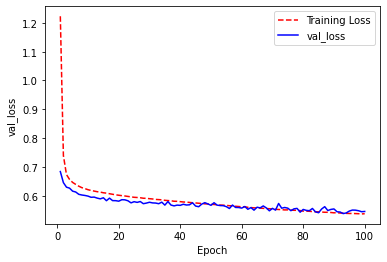

In [31]:
# Get training and test loss histories
training_loss = hist2.history['loss']
val_loss = hist2.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, val_loss, 'b-')
plt.legend(['Training Loss', 'val_loss'])
plt.xlabel('Epoch')
plt.ylabel('val_loss')
plt.show();

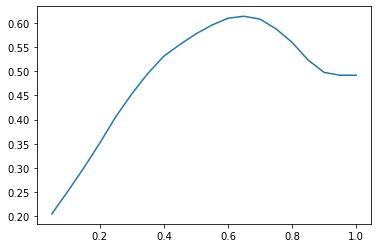

In [32]:
y_predicted = model4.predict(x_test)
k =[]
f1score = []
for i in range(1,21,1):
    i = i*0.05
    k.append(i)
    y_pred = [1 if x>i else 0 for x in y_predicted]
    f1score.append(fbeta_score(y_test, y_pred, average='macro',beta=2))
plt.plot(k,f1score)

Text(33.0, 0.5, 'Actual label')

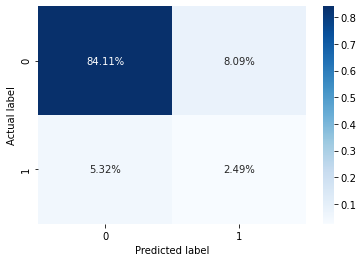

In [33]:
y_pred = model4.predict(x_test) 
y_pred = [1 if x>0.7 else 0 for x in y_pred]
mat = confusion_matrix(y_test, y_pred)
labels = ['Legitimate', 'Fraudulent']
sns.heatmap(mat/np.sum(mat), annot=True,fmt='.2%', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('Actual label')

In [34]:
print(classification_report(y_test, y_pred, target_names=['Class 0','Class 1']))
print('f2 score: ' + str(fbeta_score(y_test, y_pred,average='macro', beta =2 )))
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_pred)
print('AUC Score: ' + str(metrics.auc(fpr, tpr)))

              precision    recall  f1-score   support

     Class 0       0.94      0.91      0.93     25517
     Class 1       0.24      0.32      0.27      2160

    accuracy                           0.87     27677
   macro avg       0.59      0.62      0.60     27677
weighted avg       0.89      0.87      0.88     27677

f2 score: 0.6075848473188841
AUC Score: 0.6153865469498184


<font size="6">  Model after BorderLineSmote Sampling

In [35]:
from imblearn.over_sampling import BorderlineSMOTE
sm = BorderlineSMOTE (random_state=2022, kind= 'borderline-2')
x_train2, y_train2 = sm.fit_resample(x_train, y_train)


In [36]:
model6 = Sequential([
    Dense(units=16, activation='relu', input_dim=len(df_scaled.columns)),
    Dense(units=1, activation='sigmoid')])
model6.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model6.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 16)                3232      
                                                                 
 dense_11 (Dense)            (None, 1)                 17        
                                                                 
Total params: 3,249
Trainable params: 3,249
Non-trainable params: 0
_________________________________________________________________


In [37]:
hist2 = model6.fit(x_train2, y_train2, validation_data=(x_val, y_val), epochs=100, batch_size=10000)

Epoch 1/100
40/40 [==============================] - 1s 13ms/step - loss: 1.2895 - accuracy: 0.5526 - val_loss: 0.7053 - val_accuracy: 0.6722
Epoch 2/100
40/40 [==============================] - 0s 10ms/step - loss: 0.6597 - accuracy: 0.6360 - val_loss: 0.6470 - val_accuracy: 0.6523
Epoch 3/100
40/40 [==============================] - 0s 9ms/step - loss: 0.6042 - accuracy: 0.6814 - val_loss: 0.6188 - val_accuracy: 0.6798
Epoch 4/100
40/40 [==============================] - 0s 10ms/step - loss: 0.5822 - accuracy: 0.7027 - val_loss: 0.6133 - val_accuracy: 0.6842
Epoch 5/100
40/40 [==============================] - 0s 10ms/step - loss: 0.5687 - accuracy: 0.7146 - val_loss: 0.5864 - val_accuracy: 0.7038
Epoch 6/100
40/40 [==============================] - 0s 10ms/step - loss: 0.5593 - accuracy: 0.7207 - val_loss: 0.5814 - val_accuracy: 0.7081
Epoch 7/100
40/40 [==============================] - 0s 10ms/step - loss: 0.5529 - accuracy: 0.7248 - val_loss: 0.5705 - val_accuracy: 0.7150
Epoch 8

40/40 [==============================] - 0s 11ms/step - loss: 0.4907 - accuracy: 0.7631 - val_loss: 0.5207 - val_accuracy: 0.7317
Epoch 59/100
40/40 [==============================] - 0s 10ms/step - loss: 0.4897 - accuracy: 0.7636 - val_loss: 0.5312 - val_accuracy: 0.7255
Epoch 60/100
40/40 [==============================] - 0s 10ms/step - loss: 0.4900 - accuracy: 0.7638 - val_loss: 0.5126 - val_accuracy: 0.7386
Epoch 61/100
40/40 [==============================] - 0s 11ms/step - loss: 0.4894 - accuracy: 0.7643 - val_loss: 0.5291 - val_accuracy: 0.7279
Epoch 62/100
40/40 [==============================] - 0s 11ms/step - loss: 0.4884 - accuracy: 0.7649 - val_loss: 0.5202 - val_accuracy: 0.7322
Epoch 63/100
40/40 [==============================] - 0s 12ms/step - loss: 0.4878 - accuracy: 0.7652 - val_loss: 0.5198 - val_accuracy: 0.7331
Epoch 64/100
40/40 [==============================] - 0s 12ms/step - loss: 0.4873 - accuracy: 0.7655 - val_loss: 0.5166 - val_accuracy: 0.7343
Epoch 65/100

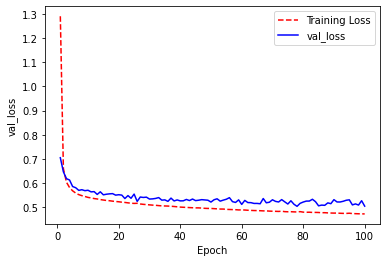

In [38]:
# Get training and test loss histories
training_loss = hist2.history['loss']
val_loss = hist2.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, val_loss, 'b-')
plt.legend(['Training Loss', 'val_loss'])
plt.xlabel('Epoch')
plt.ylabel('val_loss')
plt.show();

Text(33.0, 0.5, 'Actual label')

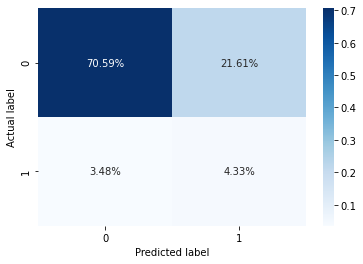

In [39]:
y_pred = model6.predict(x_test) 
y_pred = [1 if x> 0.5 else 0 for x in y_pred]
mat = confusion_matrix(y_test, y_pred)
labels = ['Legitimate', 'Fraudulent']
sns.heatmap(mat/np.sum(mat), annot=True,fmt='.2%', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('Actual label')

In [40]:
print(classification_report(y_test, y_pred, target_names=['Class 0','Class 1']))
print('f2 score: ' + str(fbeta_score(y_test, y_pred,average='macro', beta =2 )))
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_pred)
print('AUC Score: ' + str(metrics.auc(fpr, tpr)))

              precision    recall  f1-score   support

     Class 0       0.95      0.77      0.85     25517
     Class 1       0.17      0.55      0.26      2160

    accuracy                           0.75     27677
   macro avg       0.56      0.66      0.55     27677
weighted avg       0.89      0.75      0.80     27677

f2 score: 0.5878375894141334
AUC Score: 0.6601380307101004


In [41]:
model7 = Sequential([
    Dense(units=120, activation='relu', input_dim=len(df_scaled.columns)),
    Dropout(0.5),
    Dense(units=16, activation='relu'),
    Dense(units=1, activation='sigmoid')])
model7.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model7.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 120)               24240     
                                                                 
 dropout_2 (Dropout)         (None, 120)               0         
                                                                 
 dense_13 (Dense)            (None, 16)                1936      
                                                                 
 dense_14 (Dense)            (None, 1)                 17        
                                                                 
Total params: 26,193
Trainable params: 26,193
Non-trainable params: 0
_________________________________________________________________


In [42]:
hist2 = model7.fit(x_train2, y_train2, validation_data=(x_val, y_val), epochs=100, batch_size=10000)

Epoch 1/100
40/40 [==============================] - 1s 28ms/step - loss: 1.1492 - accuracy: 0.5680 - val_loss: 0.6017 - val_accuracy: 0.6524
Epoch 2/100
40/40 [==============================] - 1s 24ms/step - loss: 0.7484 - accuracy: 0.6179 - val_loss: 0.6812 - val_accuracy: 0.4505
Epoch 3/100
40/40 [==============================] - 1s 24ms/step - loss: 0.6549 - accuracy: 0.6442 - val_loss: 0.6191 - val_accuracy: 0.6485
Epoch 4/100
40/40 [==============================] - 1s 25ms/step - loss: 0.6177 - accuracy: 0.6670 - val_loss: 0.6030 - val_accuracy: 0.6694
Epoch 5/100
40/40 [==============================] - 1s 27ms/step - loss: 0.5991 - accuracy: 0.6816 - val_loss: 0.5807 - val_accuracy: 0.6926
Epoch 6/100
40/40 [==============================] - 1s 25ms/step - loss: 0.5841 - accuracy: 0.6949 - val_loss: 0.5672 - val_accuracy: 0.7090
Epoch 7/100
40/40 [==============================] - 1s 24ms/step - loss: 0.5744 - accuracy: 0.7054 - val_loss: 0.5606 - val_accuracy: 0.7081
Epoch 

40/40 [==============================] - 1s 25ms/step - loss: 0.3971 - accuracy: 0.8207 - val_loss: 0.4007 - val_accuracy: 0.8128
Epoch 59/100
40/40 [==============================] - 1s 24ms/step - loss: 0.3945 - accuracy: 0.8232 - val_loss: 0.4116 - val_accuracy: 0.8055
Epoch 60/100
40/40 [==============================] - 1s 24ms/step - loss: 0.3935 - accuracy: 0.8234 - val_loss: 0.4074 - val_accuracy: 0.8075
Epoch 61/100
40/40 [==============================] - 1s 25ms/step - loss: 0.3920 - accuracy: 0.8243 - val_loss: 0.3996 - val_accuracy: 0.8148
Epoch 62/100
40/40 [==============================] - 1s 24ms/step - loss: 0.3896 - accuracy: 0.8247 - val_loss: 0.4188 - val_accuracy: 0.8001
Epoch 63/100
40/40 [==============================] - 1s 30ms/step - loss: 0.3882 - accuracy: 0.8257 - val_loss: 0.4077 - val_accuracy: 0.8071
Epoch 64/100
40/40 [==============================] - 1s 30ms/step - loss: 0.3882 - accuracy: 0.8265 - val_loss: 0.4017 - val_accuracy: 0.8120
Epoch 65/100

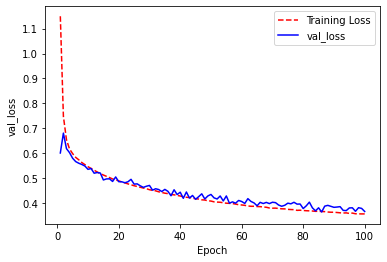

In [43]:
# Get training and test loss histories
training_loss = hist2.history['loss']
val_loss = hist2.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, val_loss, 'b-')
plt.legend(['Training Loss', 'val_loss'])
plt.xlabel('Epoch')
plt.ylabel('val_loss')
plt.show();

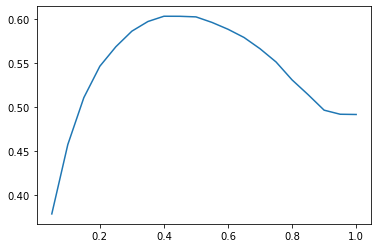

In [44]:
y_predicted = model7.predict(x_test)
k =[]
f1score = []
for i in range(1,21,1):
    i = i*0.05
    k.append(i)
    y_pred = [1 if x>i else 0 for x in y_predicted]
    f1score.append(fbeta_score(y_test, y_pred, average='macro',beta=2))
plt.plot(k,f1score)

Text(33.0, 0.5, 'Actual label')

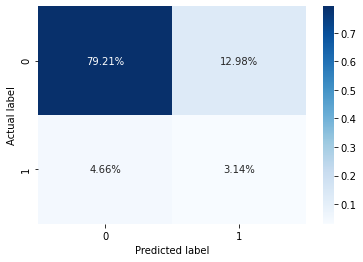

In [45]:
y_pred = model7.predict(x_test) 
y_pred = [1 if x> 0.45 else 0 for x in y_pred]
mat = confusion_matrix(y_test, y_pred)
labels = ['Legitimate', 'Fraudulent']
sns.heatmap(mat/np.sum(mat), annot=True,fmt='.2%', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('Actual label')

In [46]:
print(classification_report(y_test, y_pred, target_names=['Class 0','Class 1']))
print('f2 score: ' + str(fbeta_score(y_test, y_pred,average='macro', beta =2 )))
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_pred)
print('AUC Score: ' + str(metrics.auc(fpr, tpr)))

              precision    recall  f1-score   support

     Class 0       0.94      0.86      0.90     25517
     Class 1       0.19      0.40      0.26      2160

    accuracy                           0.82     27677
   macro avg       0.57      0.63      0.58     27677
weighted avg       0.89      0.82      0.85     27677

f2 score: 0.6034855365532176
AUC Score: 0.630984844526307


<font size="6"> Model after UnderSampling

In [47]:
undersample = RandomUnderSampler(sampling_strategy=1)
x_train3, y_train3 = undersample.fit_resample(x_train, y_train)

In [48]:
model8 = Sequential([
    Dense(units=120, activation='relu', input_dim=len(df_scaled.columns)),
    Dropout(0.5),
    Dense(units=16, activation='relu'),
    Dense(units=1, activation='sigmoid')])
model8.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model8.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 120)               24240     
                                                                 
 dropout_3 (Dropout)         (None, 120)               0         
                                                                 
 dense_16 (Dense)            (None, 16)                1936      
                                                                 
 dense_17 (Dense)            (None, 1)                 17        
                                                                 
Total params: 26,193
Trainable params: 26,193
Non-trainable params: 0
_________________________________________________________________


In [49]:
hist2 = model8.fit(x_train3, y_train3, validation_data=(x_val, y_val), epochs=100, batch_size=10000)

Epoch 1/100
4/4 [==============================] - 1s 96ms/step - loss: 2.0782 - accuracy: 0.5037 - val_loss: 1.2734 - val_accuracy: 0.5346
Epoch 2/100
4/4 [==============================] - 0s 46ms/step - loss: 1.4950 - accuracy: 0.5084 - val_loss: 0.5261 - val_accuracy: 0.8361
Epoch 3/100
4/4 [==============================] - 0s 45ms/step - loss: 1.4012 - accuracy: 0.5267 - val_loss: 0.5263 - val_accuracy: 0.8074
Epoch 4/100
4/4 [==============================] - 0s 48ms/step - loss: 1.3278 - accuracy: 0.5384 - val_loss: 0.5788 - val_accuracy: 0.7242
Epoch 5/100
4/4 [==============================] - 0s 47ms/step - loss: 1.2490 - accuracy: 0.5458 - val_loss: 0.6457 - val_accuracy: 0.6107
Epoch 6/100
4/4 [==============================] - 0s 46ms/step - loss: 1.2020 - accuracy: 0.5521 - val_loss: 0.7463 - val_accuracy: 0.5514
Epoch 7/100
4/4 [==============================] - 0s 45ms/step - loss: 1.1573 - accuracy: 0.5531 - val_loss: 0.7727 - val_accuracy: 0.5744
Epoch 8/100
4/4 [===

4/4 [==============================] - 0s 42ms/step - loss: 0.6477 - accuracy: 0.6492 - val_loss: 0.6423 - val_accuracy: 0.7143
Epoch 60/100
4/4 [==============================] - 0s 42ms/step - loss: 0.6440 - accuracy: 0.6546 - val_loss: 0.6420 - val_accuracy: 0.7145
Epoch 61/100
4/4 [==============================] - 0s 43ms/step - loss: 0.6415 - accuracy: 0.6531 - val_loss: 0.6360 - val_accuracy: 0.7170
Epoch 62/100
4/4 [==============================] - 0s 44ms/step - loss: 0.6381 - accuracy: 0.6548 - val_loss: 0.6329 - val_accuracy: 0.7175
Epoch 63/100
4/4 [==============================] - 0s 42ms/step - loss: 0.6410 - accuracy: 0.6552 - val_loss: 0.6295 - val_accuracy: 0.7177
Epoch 64/100
4/4 [==============================] - 0s 43ms/step - loss: 0.6438 - accuracy: 0.6558 - val_loss: 0.6292 - val_accuracy: 0.7176
Epoch 65/100
4/4 [==============================] - 0s 42ms/step - loss: 0.6429 - accuracy: 0.6546 - val_loss: 0.6299 - val_accuracy: 0.7161
Epoch 66/100
4/4 [========

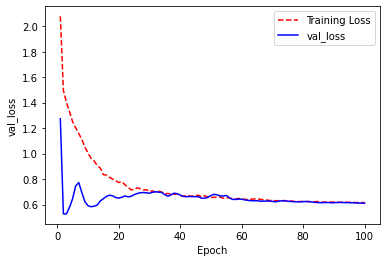

In [50]:
# Get training and test loss histories
training_loss = hist2.history['loss']
val_loss = hist2.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, val_loss, 'b-')
plt.legend(['Training Loss', 'val_loss'])
plt.xlabel('Epoch')
plt.ylabel('val_loss')
plt.show();

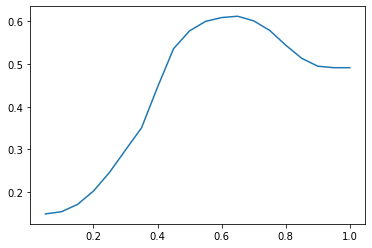

In [51]:
y_predicted = model8.predict(x_test)
k =[]
f1score = []
for i in range(1,21,1):
    i = i*0.05
    k.append(i)
    y_pred = [1 if x>i else 0 for x in y_predicted]
    f1score.append(fbeta_score(y_test, y_pred, average='macro',beta=2))
plt.plot(k,f1score)

Text(33.0, 0.5, 'Actual label')

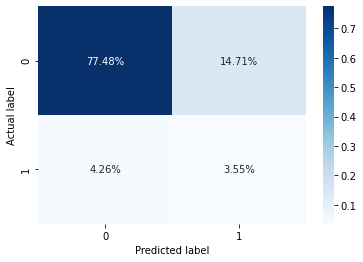

In [52]:
y_pred = model8.predict(x_test) 
y_pred = [1 if x> 0.6 else 0 for x in y_pred]
mat = confusion_matrix(y_test, y_pred)
labels = ['Legitimate', 'Fraudulent']
sns.heatmap(mat/np.sum(mat), annot=True,fmt='.2%', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('Actual label')

In [53]:
print(classification_report(y_test, y_pred, target_names=['Class 0','Class 1']))
print('f2 score: ' + str(fbeta_score(y_test, y_pred,average='macro', beta =2 )))
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_pred)
print('AUC Score: ' + str(metrics.auc(fpr, tpr)))

              precision    recall  f1-score   support

     Class 0       0.95      0.84      0.89     25517
     Class 1       0.19      0.45      0.27      2160

    accuracy                           0.81     27677
   macro avg       0.57      0.65      0.58     27677
weighted avg       0.89      0.81      0.84     27677

f2 score: 0.6092384633613768
AUC Score: 0.6475248708558854


<font size="4"> Work done by Lin Yi for SMU AML project. Not for external Distribution